In [76]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

**Objective and goal for this lab**

For this lab, we're going to see how we can transform images to a format we're used to working with, and can thus use for training classification (or regression) models.

We will be using the MNIST-dataset, which is a famous dataset of handwritten black & white digits between 0-9. Our goal will be to train a classifier to correctly classify each image as the digit it portrays.

You can read more about MNIST [here](https://en.wikipedia.org/wiki/MNIST_database).

---

**Load the data**

In [2]:
import struct
import numpy as np

def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        _, num, rows, cols = struct.unpack(">IIII", f.read(16))
        return np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        _, num = struct.unpack(">II", f.read(8))
        return np.fromfile(f, dtype=np.uint8)

# Load training data
train_images = load_mnist_images("../data/mnist/train-images.idx3-ubyte")
train_labels = load_mnist_labels("../data/mnist/train-labels.idx1-ubyte")

# Load test data
test_images = load_mnist_images("../data/mnist/t10k-images.idx3-ubyte")
test_labels = load_mnist_labels("../data/mnist/t10k-labels.idx1-ubyte")

Let's investigate what we just loaded

In [3]:
print('train_images shape :', train_images.shape)
print('test_images shape  :', test_images.shape, end='\n\n')

print('train_labels shape :', train_labels.shape)
print('test_labels shape  :', test_labels.shape)

train_images shape : (60000, 28, 28)
test_images shape  : (10000, 28, 28)

train_labels shape : (60000,)
test_labels shape  : (10000,)


So both train and test images are 3D-arrays. Let's pick the first item in train_images and investigate it

In [12]:
print('train_images[0] :', train_images[0].shape)

train_images[0] : (28, 28)


So, the first (out of 60.000) items in train_images is a 28x28 array. Actually, it's an image of size 28x28 pixels.

We can visualise this easily

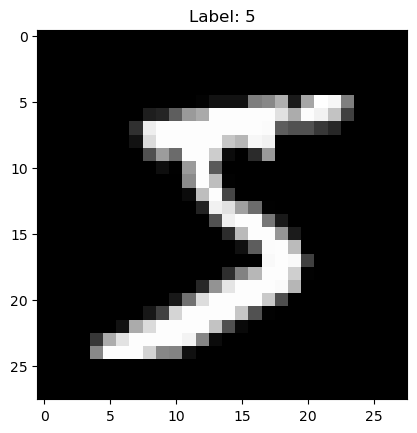

In [5]:
plt.imshow(train_images[0], cmap='gray');
plt.title(f'Label: {train_labels[0]}')
plt.show()

As you might've noticed, the train_labels contain the true labels (i.e., the targets) for each handwritten image.

Let's plot some more images

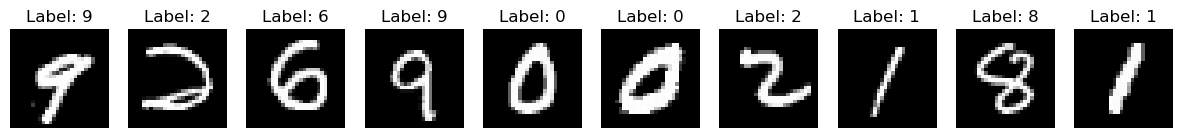

In [14]:
import random

number_of_images = 10

indices = random.sample(range(60000), number_of_images)

fig, axes = plt.subplots(1, number_of_images, figsize=(15, 3))

for idx, ax in zip(indices, axes):
    ax.imshow(train_images[idx], cmap='gray')
    ax.set_title(f'Label: {train_labels[idx]}')
    ax.axis('off')

plt.show()

---

Ok, so how do we transform this data into a format that we can train the models we've learnt about thus far? 

Well,  what we'll do is that we're going to use *every pixel as it's own feature*. Since each image is 28x28 pixels, we're going to have 28x28 = 784 features for each image.

We can use flatten() to transform a 2D (28,28) shaped array to a single 1D (784) array.

In [16]:
# easy transformation

train_images[0].flatten().shape

(784,)

In [8]:
# now we do it for all the images in the train_images

train_images_flattened = [list(image.flatten()) for image in train_images]

In [9]:
train_images_flattened_array = np.array([image.flatten() for image in train_images])

# transform that list to a dataframe so that we can see what's going on
X_train_val = pd.DataFrame(train_images_flattened_array)

X_train_val


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# might aswell make the labels into a dataframe too

y_train_val = pd.DataFrame(train_labels)

y_train_val

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


Cool, no we're on familiar ground! We have our X_train_val (features) and y_train_val (targets) in a suitable format.

Now we can try training some multiclass classification models on this data!

---

## Challenges

**Task 1**

Transform test_images and test_labels similarly as above, and save them as X_test and y_test.

This is the test set you will use at the end, to assess final performance!

In [28]:
test_images_flattened_array = np.array([image.flatten() for image in test_images])

X_test= pd.DataFrame(test_images_flattened_array)

y_test = pd.DataFrame(test_labels)


**Task 1.5 (bonus**)

Let's normalize our features! Because why not. It won't hurt the algorithms that don't require it - and we might aswell show how easily images can be scaled properly.

In the case for gray-scale images, we simply divide all features (pixels) by 255. Why? Because that's the maximum possible value. This will bring all grayscale values to the range [0,1].

In [45]:
X_train_val = X_train_val/255

X_test = X_test/255


Awesome. Done. Feel free to check that all grayscale values are properly scaled.

**Task 2**

Using all 784 features (no additional feature engineering or manipulation needed), start training and GridSearching for the best performing hyperparameters for 

KNN, DecisionTree, RandomForest, AdaBoost (chose yourself which base estimator to use)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

knn_params = {
    "n_neighbors": [3, 5],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, n_jobs=-1)

dt_params = {
    "max_depth": [5, 10],
    "min_samples_split": [2, 5],
    "criterion": ["gini", "entropy"]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=23), dt_params, cv=3, n_jobs=-1)

rf_params = {
    "max_depth": [5, 10],
    "n_estimators": [10, 50],
    "max_features": ["sqrt", "log2"]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=23), rf_params, cv=3, n_jobs=-1)

ada_params = {
    "n_estimators": [10, 50],
    "learning_rate": [0.1, 1.0],
    "estimator": [DecisionTreeClassifier(max_depth=1)]
}
ada_grid = GridSearchCV(AdaBoostClassifier(random_state=23), ada_params, cv=3, n_jobs=-1)

grids = {
    "KNN": knn_grid,
    "Decision Tree": dt_grid,
    "Random Forest": rf_grid,
    "AdaBoost": ada_grid
}

for name, grid, in grids.items():
    print(f"\n=== Trainging {name} ====")
    grid.fit(X_train_val, y_train_val)
    print(f"Best params: {grid.best_params_}")
    print(f"Best validation accuracy: {grid.best_score_:.4f}")


=== Trainging KNN ====


Best params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best validation accuracy: 0.9693

=== Trainging Decision Tree ====
Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best validation accuracy: 0.1124

=== Trainging Random Forest ====
Best params: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}
Best validation accuracy: 0.1124

=== Trainging AdaBoost ====
Best params: {'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1, 'n_estimators': 10}
Best validation accuracy: 0.1124


In [65]:
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier())

param_grid = {
    "n_estimators": [10, 50, 100],
    "learning_rate": [0.01, 0.1, 1],
    "estimator__max_depth": [5, 10],
    "estimator__min_samples_split": [2, 5],
    "estimator__criterion": ["gini", "entropy"]

}

grid_search = GridSearchCV(adaboost, 
                           param_grid, 
                           cv=3, 
                           scoring="accuracy", 
                           n_jobs=1)

grid_result = grid_search.fit(X_train_val, y_train_val)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
print('---'*25, end='\n\n')

mean_test_scores = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean_test_score, param in zip(mean_test_scores, params):
    print('params:')
    print(f"{param}")
    print('mean accuracy:')
    print(f'{round(mean_test_score,4)}')
    print('---'*25, end='\n\n')

Best: 0.11236666666666667 using {'estimator__criterion': 'gini', 'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 10}
---------------------------------------------------------------------------

params:
{'estimator__criterion': 'gini', 'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 10}
mean accuracy:
0.1124
---------------------------------------------------------------------------

params:
{'estimator__criterion': 'gini', 'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 50}
mean accuracy:
0.1124
---------------------------------------------------------------------------

params:
{'estimator__criterion': 'gini', 'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 100}
mean accuracy:
0.1124
---------------------------------------------------------------------------

params:
{'estimat

**Task 3**

When you have the best performing hyperparameters, do an ordinary train/validation split on X_train_val and y_train_val.

Train the models with their respective best performing hyperparameters on X_train and then evaluate performance on X_val.

In particular, make good use of confusion matrices here.

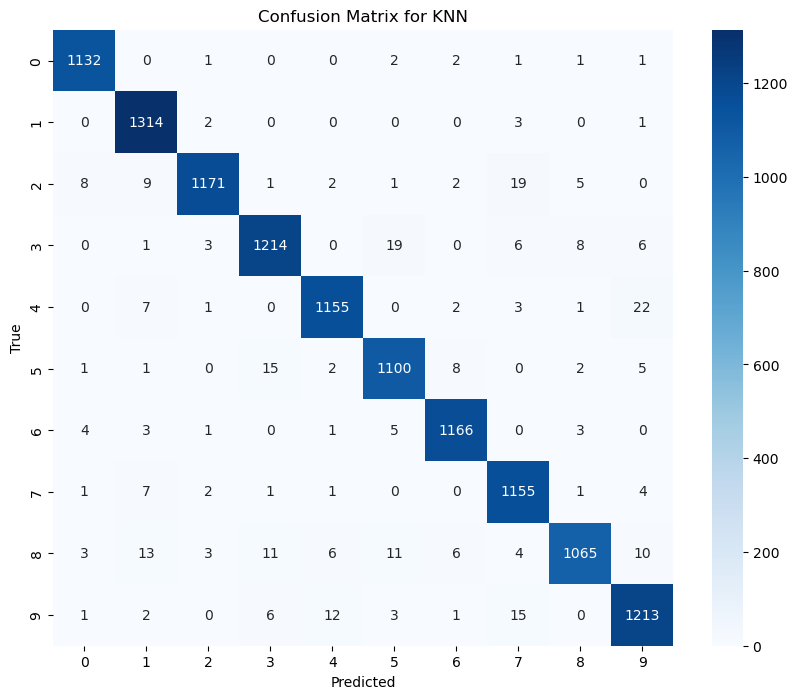

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1140
           1       0.97      1.00      0.98      1320
           2       0.99      0.96      0.98      1218
           3       0.97      0.97      0.97      1257
           4       0.98      0.97      0.97      1191
           5       0.96      0.97      0.97      1134
           6       0.98      0.99      0.98      1183
           7       0.96      0.99      0.97      1172
           8       0.98      0.94      0.96      1132
           9       0.96      0.97      0.96      1253

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=41)

knn = KNeighborsClassifier(n_neighbors=3, weights="distance", metric="euclidean")
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

# 8. Classification report
print(classification_report(y_val, y_pred))

**Task 4**

For the models you've trained in Task 3, try plotting the validation samples they classified **incorrectly**. As the title for each image, write the true label and the predicted label.

Do the mistakes kinda make sense? Can you forgive your models? :)

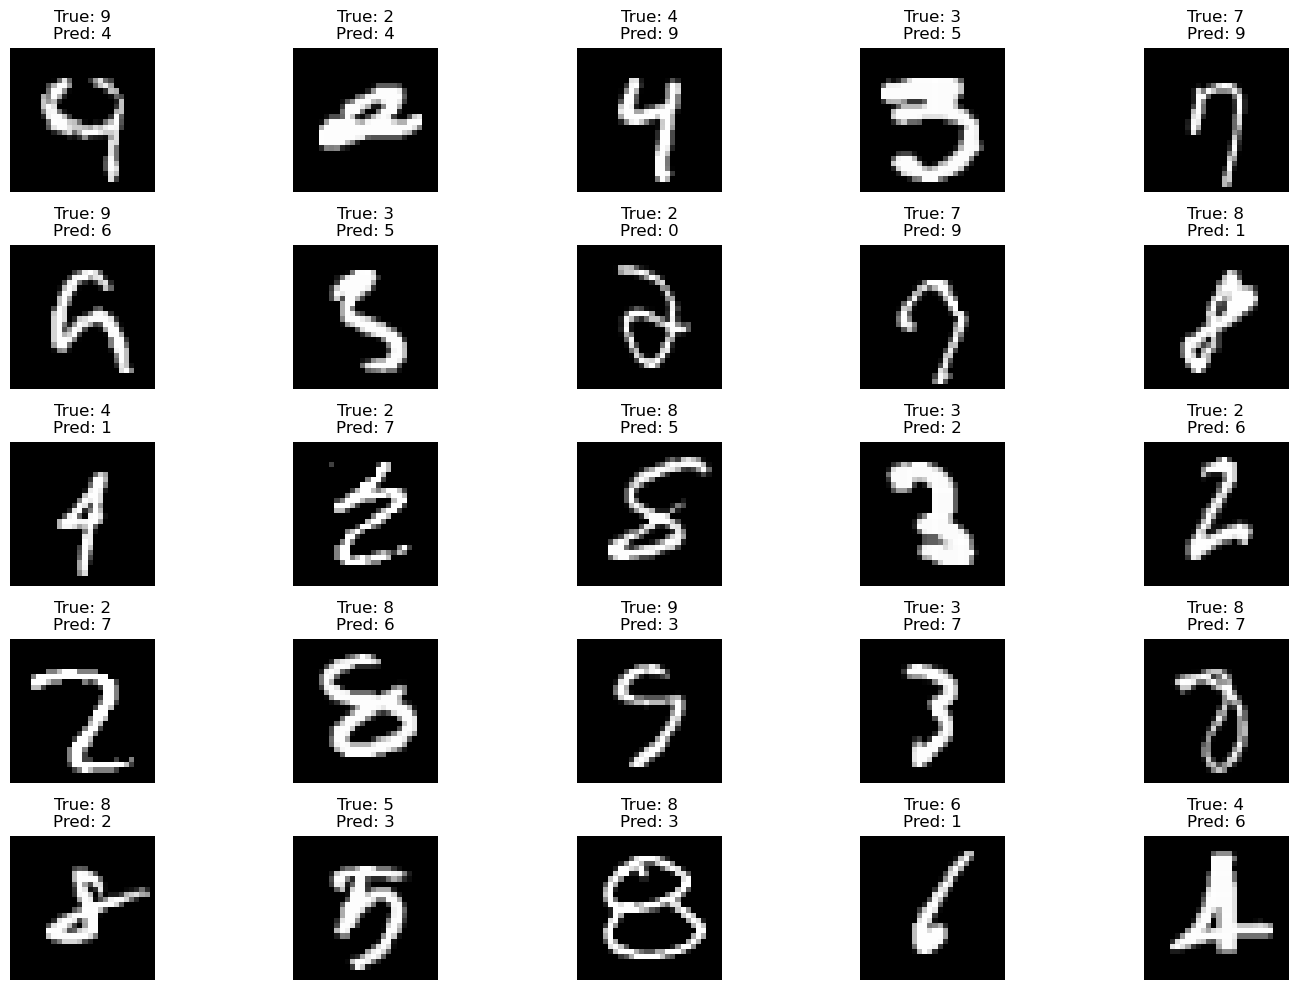

Total misclassified samples: 315/12000
Accuracy on validation set: 97.38%


In [99]:
knn = KNeighborsClassifier(n_neighbors=3, weights="distance", metric="euclidean")
knn.fit(X_train_val, y_train_val)
knn_pred = knn.predict(X_test)

X_val_array = X_val.values if hasattr(X_val, "values") else np.array(X_val)
y_val_array = y_val.values if hasattr(y_val, "values") else np.array(y_val)

misclassified = np.where(y_pred != y_val)[0]

plt.figure(figsize=(15, 10))
for i , bad_index in enumerate(misclassified[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_val_array[bad_index].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_val_array[bad_index]}\nPred: {y_pred[bad_index]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

print(f"Total misclassified samples: {len(misclassified)}/{len(y_val_array)}")
print(f"Accuracy on validation set: {100*(1-len(misclassified)/len(y_val_array)):.2f}%")

**Task 5**

For each model with the identified best performing hyperparameters, do a full training on X_train_val - then assess performance on X_test.

Which model did you find to perform worst/best? Is the difference large?

**Task 6**

If you feel frisky, you can try a tad more difficult problem. Try loading and training on the [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset instead. 

It's a relatively more difficult dataset to classify.